<a href="https://colab.research.google.com/github/nhamhung/Coder-School-Machine-Learning/blob/master/%5BHung%5D_89_of_Weekly_project_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) can be used as drop-in replacement for the original MNIST dataset (10 categories of handwritten digits). It shares the same image size (28x28) and structure of training (60,000) and testing (10,000) splits. The class labels are:

| Label|	Description|
|-|-|
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|

**Example**

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" width="50%"/>

In this notebook, you need to train a classical ML model (no deep learning) to reach the highest accruracy score. Please follow the ML project checklist and make sure you organize your code well.

**Expected Accuracy Score: >89%**

**Submission:** share your notebook to instructors, and prepare your presentation on the next Monday morning.

## Get Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


# EDA

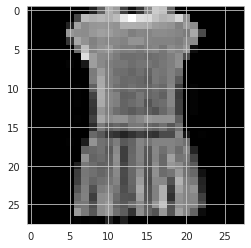

In [ ]:
plt.imshow(X_train[3], cmap='gray')

In [ ]:
def plot_images(images, labels):
  '''Plot images with their labels. Ten each row'''
  plt.figure(figsize=(20,10))
  columns = 10
  for i, image in enumerate(images):
    ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
    ax.set_title(f"{labels[i]}", fontsize=16)
    plt.axis('off')
    plt.subplots_adjust(bottom=0.1)
    plt.imshow(image, cmap='gray')

In [ ]:
def get_samples(n_samples, X, y):
  '''Get n_samples randomly'''
  samples_index = np.random.choice(np.arange(len(y)), n_samples, replace=False)
  return X[samples_index], y[samples_index]

In [ ]:
def get_digit(digit, n_samples, X, y):
  '''Get n_samples images of the class digit accordingly'''
  y_digit = y[y == digit]
  samples_index = np.random.choice(np.arange(len(y_digit)), n_samples, replace=False)
  return X[y == digit][samples_index], y_digit[samples_index]

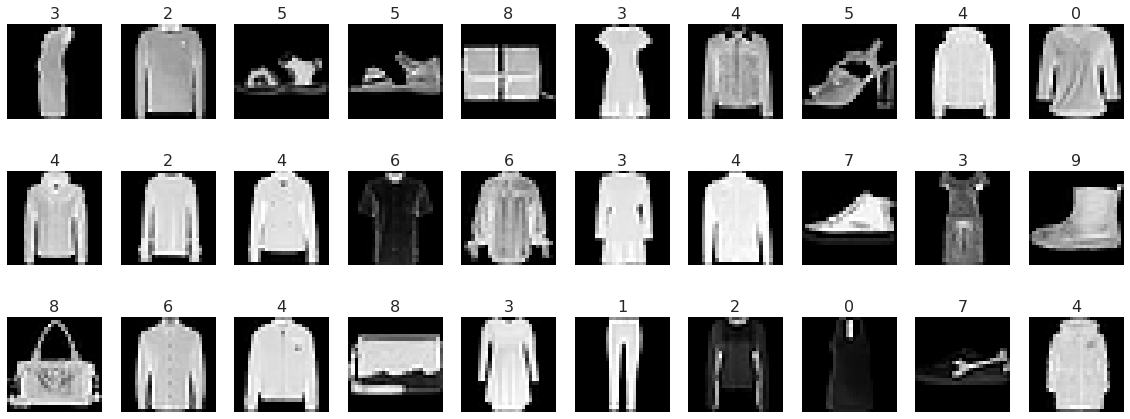

In [ ]:
images, labels = get_samples(30, X_train, y_train)
plot_images(images, labels)

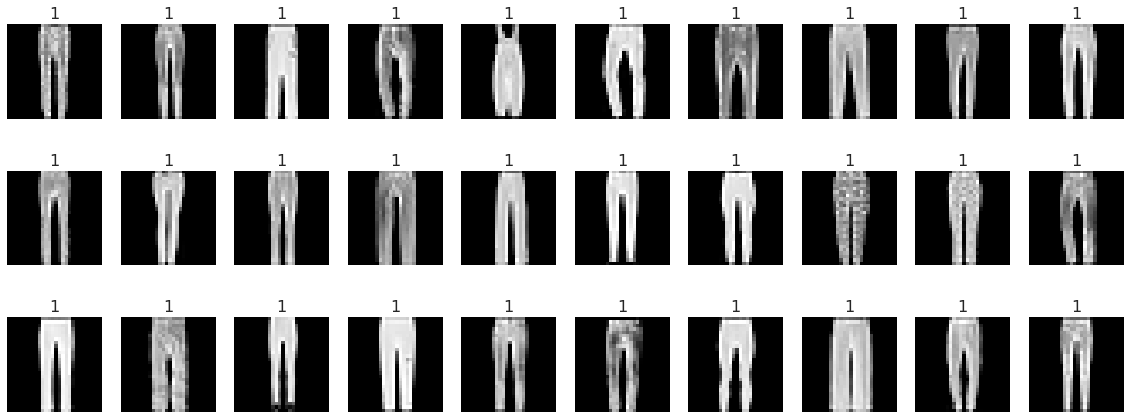

In [ ]:
images1, labels1 = get_digit(1, 30, X_train, y_train)
plot_images(images1, labels1)

# Number of images in each class in test set

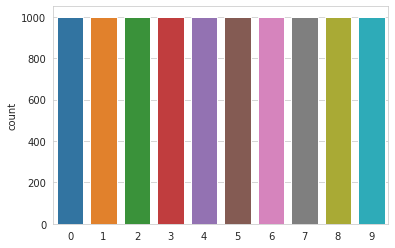

In [ ]:
sns.countplot(y_test)

# Range of pixel

In [ ]:
print('Pixel value range:', X_train.min(), X_train.max())

Pixel value range: 0 255


# Data transformation

In [ ]:
n_samples = 2000
n_test_samples = 400

# Your code here

X_train_flat, y_train_flat = get_samples(n_samples, X_train, y_train)
X_test_flat, y_test_flat = get_samples(n_test_samples, X_test, y_test)

In [ ]:
# Normalization
X_train_flat = X_train_flat.reshape((n_samples, -1))/255
X_test_flat = X_test_flat.reshape((n_test_samples, -1))/255

In [ ]:
print('Training data', X_train_flat.shape)
print('Test data', X_test_flat.shape)

Training data (2000, 784)
Test data (400, 784)


# Train models

## Test random SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Your code here
clf = SVC(kernel='rbf', C=10)
clf.fit(X_train_flat, y_train_flat)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(X_test_flat)

In [ ]:
print("Accuracy score: ", accuracy_score(y_pred, y_test_flat))

Accuracy score:  0.83


## Testing SVC hyperparameters

In [ ]:
parameters = {'gamma': [0.001, 0.01, 0.1, 1],
              'C':[0.01, 0.1, 1, 10, 100],
              'kernel': ['rbf', 'poly', 'sigmoid']}

model = SVC()

gridsearch_models = GridSearchCV(estimator=model,
                                 param_grid=parameters,
                                 scoring='accuracy',
                                 cv=5, n_jobs=-1)

gridsearch_models.fit(X_train_flat, y_train_flat)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# pd.DataFrame(gridsearch_models.cv_results_)

In [ ]:
print('Best params', gridsearch_models.best_params_)
print('Best score', gridsearch_models.best_score_)

Best params {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best score 0.841


In [ ]:
best_model = gridsearch_models.best_estimator_

In [ ]:
# Your code here
predictions = best_model.predict(X_test_flat)
print('Accuracy Score:', accuracy_score(y_test_flat, predictions))

Accuracy Score: 0.8275


## Voting classifier

In [ ]:
# Voting Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression(random_state = 1)
knn = KNeighborsClassifier(n_neighbors=27)
dtc = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=1)

classifiers = [('Log Reg', lr),
               ('Knn', knn),
               ('Decision Tree Classifier', dtc)]
for clf_name, clf in classifiers:
  clf.fit(X_train_flat, y_train_flat)
  y_pred = (clf.predict(X_test_flat))
  print('{:s} : {:3f}'.format(clf_name,accuracy_score(y_test_flat,y_pred)))
  print('confusion matrix:\n',confusion_matrix(y_test_flat,y_pred))
  print('classification report:\n',classification_report(y_test_flat,y_pred))

Log Reg : 0.802500
confusion matrix:
 [[34  0  3  3  0  0  5  0  0  0]
 [ 0 36  0  2  1  0  0  0  0  0]
 [ 1  0 24  1  4  1  1  0  0  0]
 [ 2  0  2 31  3  0  2  0  0  0]
 [ 0  0  2  3 32  0  4  0  1  0]
 [ 0  0  0  0  0 35  0  2  1  4]
 [ 5  0  4  4  6  0 13  0  2  0]
 [ 0  0  0  0  0  2  0 43  0  4]
 [ 0  0  1  0  0  0  1  1 34  0]
 [ 0  0  0  0  0  0  0  1  0 39]]
classification report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78        45
           1       1.00      0.92      0.96        39
           2       0.67      0.75      0.71        32
           3       0.70      0.78      0.74        40
           4       0.70      0.76      0.73        42
           5       0.92      0.83      0.88        42
           6       0.50      0.38      0.43        34
           7       0.91      0.88      0.90        49
           8       0.89      0.92      0.91        37
           9       0.83      0.97      0.90        40

    accurac

## Evaluate with a few classifiers

In [ ]:
# Evaluate function
def base_learners_evaluations(X_train, X_test, y_train, y_test):
    
    idx = []
    scores = { 'Accuracy':[]}
    for bc in base_classifiers:
        lr = bc[1]
        lr.fit(X_train, y_train)

        predictions = lr.predict(X_test)
        idx.append(bc[0])
        scores['Accuracy'].append(metrics.accuracy_score(y_test, predictions))

    return pd.DataFrame(data=scores, index=idx)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Base learners
base_classifiers = [('Decision Tree 3', DecisionTreeClassifier(max_depth=3)),
                    ('Decision Tree 5', DecisionTreeClassifier(max_depth=5)),
                    ('Decision Tree 8', DecisionTreeClassifier(max_depth=8)),
                    ('Naive Bayes', GaussianNB()),
                    ('Logistic Regression', LogisticRegression())]

base_learners_evaluations(X_train_flat, X_test_flat, y_train_flat, y_test_flat)

,Accuracy
Decision Tree 3,0.4900
Decision Tree 5,0.6700
Decision Tree 8,0.6725
Naive Bayes,0.5725
Logistic Regression,0.8025


## Bagging Classifier




In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=200, random_state=1)

# Fit bc to the training set
bc.fit(X_train_flat, y_train_flat)

# Predict test set labels
y_pred = bc.predict(X_test_flat)

# Evaluate acc_test
acc_test = accuracy_score(y_test_flat, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.80


In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

# Fit bc to the training set 
bc.fit(X_train_flat, y_train_flat)

# Predict test set labels
y_pred = bc.predict(X_test_flat)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test_flat, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.767, OOB accuracy: 0.797


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, min_samples_leaf =.1, random_state = 0 )
rf.fit(X_train_flat,y_train_flat)
y_pred = rf.predict(X_test_flat)

In [ ]:
rf_score =accuracy_score(y_test_flat,y_pred)
print('Score of Random Forest: {:.3f}'.format(rf_score))


Score of Random Forest: 0.552


## Adaboost

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

# Fit ada to the training set
ada.fit(X_train_flat, y_train_flat)

# Compute the probabilities of obtaining the positive class
y_pred = ada.predict(X_test_flat)

ada_score =accuracy_score(y_test_flat,y_pred)
print('Score of Adaboost: {:.3f}'.format(rf_score))

Score of Adaboost: 0.552


## GridSearchCV for RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [ ]:
# Define the dictionary 'params_rf'
params_rf = {
    'n_estimators': [100, 350, 500],
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [2, 10, 30]
}

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='accuracy',
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

In [ ]:
grid_rf.fit(X_train_flat, y_train_flat)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  4.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=0.1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                 

In [ ]:
print('Best params', grid_rf.best_params_)
print('Best score', grid_rf.best_score_)
grid_rf.best_estimator_

Best params {'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 100}
Best score 0.828


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
best_mod = gridsearch_models.best_estimator_

In [ ]:
# Your code here
predictions = best_mod.predict(X_test_flat)
print('Accuracy Score:', accuracy_score(y_test_flat, predictions))

Accuracy Score: 0.8275


## Voting Classifier

In [ ]:
# %%time
# from sklearn.ensemble import VotingClassifier

# models_comparison = {}

# base_classifiers = [('Decision Tree 3', DecisionTreeClassifier(max_depth=3)),
#                     ('Decision Tree 5', DecisionTreeClassifier(max_depth=5)),
#                     ('Decision Tree 8', DecisionTreeClassifier(max_depth=8)),
#                     ('Naive Bayes', GaussianNB()),
#                     ('Logistic Regression', LogisticRegression())]

# ensemble = VotingClassifier(base_classifiers)     

# ensemble_data_origin = ensemble_evaluation(data, ensemble, label='Original')

# models_comparison['Voting'] = pd.concat([ensemble_data_origin, ensemble_data_filtered], axis=0)

## Testing on original data

In [ ]:
# Get all the data
# Run it after you finish training with the 1000 samples
X_train_flat = X_train.reshape((-1, 784))
X_test_flat = X_test.reshape((-1, 784))
y_train_flat = y_train
y_test_flat = y_test

print('Training data', X_train_flat.shape)
print('Test data', X_test_flat.shape)
print('Training label', y_train_flat.shape)
print('Test label', y_test_flat.shape)

Training data (60000, 784)
Test data (10000, 784)
Training label (60000,)
Test label (10000,)


In [ ]:
# Normalization
X_train_flat = X_train_flat/255
X_test_flat = X_test_flat/255

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
clf = SVC(kernel='rbf', C=100, gamma=0.01)
clf.fit(X_train_flat, y_train_flat)


SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Your code here
predictions = clf.predict(X_test_flat)
print('Accuracy Score:', accuracy_score(y_test_flat, predictions))

Accuracy Score: 0.8963


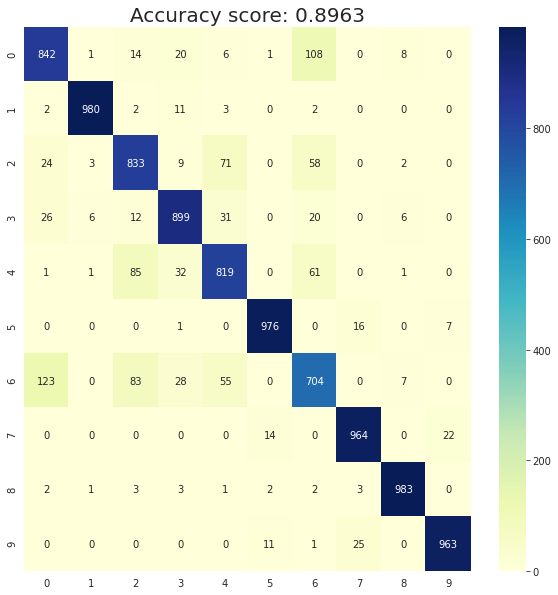

In [ ]:
# Your code here
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test_flat, predictions), cmap="YlGnBu", annot=True, fmt="d")
plt.title(f'Accuracy score: {accuracy_score(y_test_flat, predictions)}', fontsize=20)
plt.show()

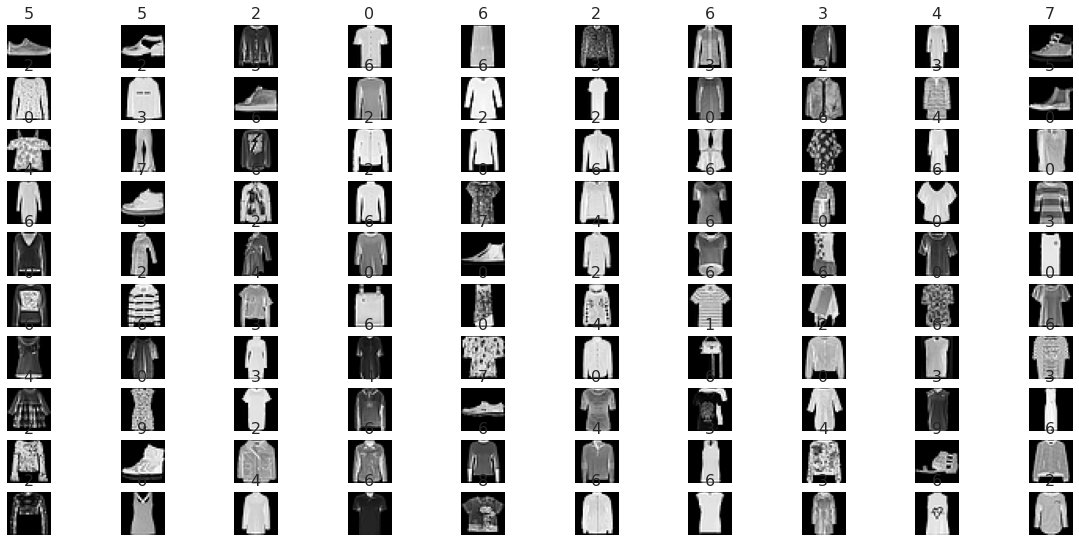

In [ ]:
# Your code here
wrong_predicted_images = X_test_flat[y_test_flat != predictions].reshape((-1, 28, 28))
wrong_predictions = predictions[y_test_flat != predictions]

plot_images(wrong_predicted_images[:100], wrong_predictions[:100])